In [28]:
import numpy as np
import pandas as pd
import seaborn as sns

## Agregaciones
<img src="./aggregations.png">

In [29]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'], 'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [30]:
# descripción de las columas y funciones de agregación 
df.describe()

,data
count,6.000000
mean,2.500000
std,1.870829
min,0.000000
25%,1.250000
50%,2.500000
75%,3.750000
max,5.000000


In [31]:
# Conocer los tipos que tienen las columnas
df.dtypes

key     object
data     int64
dtype: object

In [32]:
print(df.data.sum())
print(df.data.mean())
print(df.data.median())
print(df.data.std())
print(df.data.count())

15
2.5
2.5
1.8708286933869707
6


## Agrupación
<img src="./group.png">

In [33]:
# objeto de la vista del dataframe.
# Lazy evaluation no se realiza la operación hasta que se defina la función de agragación
df.groupby('key')

In [34]:
# media de los valores agregados por una clave
df.groupby('key').mean()

,data
key,
A,1.5
B,2.5
C,3.5


In [35]:
df.groupby('key').max()

,data
key,
A,3
B,4
C,5


# Funcion aggregation

In [36]:
# leer a partir de un csv
df_bici = pd.read_csv('./Valenbisi.CSV', delimiter=';', encoding="ISO-8859-1")
# crear una columna con los números aplicando un corte por conjuntos
df_bici["number2"] = pd.cut(df_bici["number"], [0,100,200,300])
df_bici

,X,Y,name,number,address,open,available,free,total,ticket,updated_at,number2
0,724431.858,4375437.359,271_CALLE_SALVADOR_CERVERÓ_CALLE_CARLOS_CORTINA,271,Salvador Cerveró - Carlos Cortina,T,4,11,15,F,06/11/2018 13:04:02,"(200, 300]"
1,729455.380,4373511.941,272_VICENTE_LA_RODA_C_INGENIERO_FAUSTO_ELIO,272,Vicente la Roda - Ingeniero Fausto Elio,T,4,11,15,F,06/11/2018 13:04:02,"(200, 300]"
2,727032.722,4371091.257,43_C/ DE ORIENTE,43,Escultor José Capuz - Oriente,T,1,19,20,F,06/11/2018 13:04:02,"(0, 100]"
3,726882.491,4370748.231,44_AVDA. GRAL. URRUTIA,44,General Urrutia - Av. de la Plata,T,6,11,19,T,06/11/2018 13:04:02,"(0, 100]"
4,727759.956,4371146.034,54_PASEO ALAMEDA,54,Plaza de Europa,T,13,7,20,T,06/11/2018 13:04:02,"(0, 100]"
...,...,...,...,...,...,...,...,...,...,...,...,...
269,727903.805,4373027.620,261_PZA_XUQUER_ESQ_VINALOPO,261,Plaza Xuquer - Vinalopó,T,2,17,19,F,06/11/2018 13:04:02,"(200, 300]"
270,722883.536,4371414.658,262_AVDA_TRES_FORQUES_COLONIA_ESPANOLA_DE_MEXICO,262,Tres Forques - Colonia Española de Mexico,T,19,1,20,T,06/11/2018 13:04:02,"(200, 300]"
271,729721.075,4373790.572,171_CALLE GRAN CANARIA,171,Gran Canaria - Ingeniero Manuel Maese,T,0,15,15,F,06/11/2018 13:04:02,"(100, 200]"
272,726223.891,4370683.656,180_AVENIDA_DOCTOR_WAKSMAN,180,Doctor Waksman - Nieves,T,1,19,20,T,06/11/2018 13:04:02,"(100, 200]"


In [37]:
# Agregación a dos columnas obteniendo el minimo, maximo y media
df_bici.groupby("number2")["free", "total"].aggregate(['min', np.median, max])

free            total           
            min median max   min median max
number2                                    
(0, 100]      0     11  32    14     20  40
(100, 200]    0     13  37    14     20  40
(200, 300]    0     10  21    10     16  30

In [38]:
# filtrado del dataset de los datos en el que el conjunto de datos que no supera 10 en la media
# primero hay que crear una función de filtrado
def media(x):
    return x["free"].mean() > 10

df_bici.groupby("number2").filter(media)

,X,Y,name,number,address,open,available,free,total,ticket,updated_at,number2
2,727032.722,4371091.257,43_C/ DE ORIENTE,43,Escultor José Capuz - Oriente,T,1,19,20,F,06/11/2018 13:04:02,"(0, 100]"
3,726882.491,4370748.231,44_AVDA. GRAL. URRUTIA,44,General Urrutia - Av. de la Plata,T,6,11,19,T,06/11/2018 13:04:02,"(0, 100]"
4,727759.956,4371146.034,54_PASEO ALAMEDA,54,Plaza de Europa,T,13,7,20,T,06/11/2018 13:04:02,"(0, 100]"
5,727164.655,4373012.352,90_AVDA. BLASCO IBAÑEZ,90,"Blasco Ibañez, 32 (F. Filología)",T,38,2,40,F,06/11/2018 13:04:02,"(0, 100]"
6,727152.481,4374451.727,125_C/ MASQUEFA,125,"Masquefa, 42 - 44",T,3,12,15,F,06/11/2018 13:04:02,"(100, 200]"
...,...,...,...,...,...,...,...,...,...,...,...,...
253,728100.083,4372686.544,096_AVDA. BLASCO IBAÑEZ 6,96,Blasco Ibañez - Yecla,T,17,4,21,T,06/11/2018 13:04:02,"(0, 100]"
254,728538.878,4372645.481,097_AVDA. BLASCO IBAÑEZ 7,97,Blasco Ibañez 121,T,1,20,23,F,06/11/2018 13:04:02,"(0, 100]"
255,728093.128,4372255.939,098_SANTOS JUSTO Y PASTOR,98,Justo y Pastor - Duque de Gaeta,T,5,10,15,T,06/11/2018 13:04:02,"(0, 100]"
271,729721.075,4373790.572,171_CALLE GRAN CANARIA,171,Gran Canaria - Ingeniero Manuel Maese,T,0,15,15,F,06/11/2018 13:04:02,"(100, 200]"


# Mapeo de los índices para agrupar
1. Definir la columna que va a actuar como índice
2. Crear el dicionario de mapeo de las claves con las nuevas claves
3. Hacer la agrupación

In [39]:
df_2 = df_bici.set_index("number2")
dc_map = {0:"0-99", 1:"100-199", 2:"200-299"}
df_2.groupby(dc_map)["free", "total"].max()

,free,total


# Pivot Tables

In [40]:
# cargamos unn conjunto de datos con seaborn
# Conjunto de datos de titanic
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [41]:
# exploración inicial de los datos y sus valores
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
# supervivientes en el titanic. Se pueden aplicar distintas funciones
titanic.groupby('sex')[["sex"]].aggregate('count')
# OJO! hay que ir con cuidado con que datos se obtiene la función media...

,sex
sex,
female,314
male,577


In [43]:
titanic.groupby(['sex', 'class'])['class'].aggregate('count').unstack()

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


Buscamos obtener un poco más de información según la cantidad de variables que tiene el conjunto

In [44]:
# agregación segun el sexo y la clase, obtenemos la media de los valores de los supervivientes
titanic.groupby(['sex', 'class'])['class'].aggregate('count').unstack()

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


In [45]:
# forma más sencilla
titanic.pivot_table("survived", index="sex", columns="class")

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [46]:
# Según la documentación podemos indicar la función para hacer la agregación
titanic.pivot_table("survived", index="sex", columns="class", aggfunc='count') #, margins=True

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


In [47]:
# Se pueden hacer agregaciones sobre el índice
# ¿De qué clase y qué sexo sobrevivieron más?
titanic.pivot_table("survived", index=["sex", "alive"], columns="class", aggfunc='count', margins=True) #, margins=True

class         First  Second  Third  All
sex    alive                           
female no         3       6     72   81
       yes       91      70     72  233
male   no        77      91    300  468
       yes       45      17     47  109
All             216     184    491  891

# Visualización 

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

### Histograma

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

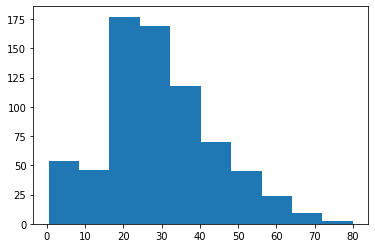

In [49]:
# Exploración de conjuntos. Estudio de la frecuencia de una muestra cuya variable es cunatitativa y continua
plt.hist(titanic["age"])

(array([23., 11., 41., 47., 44., 35., 24., 19.,  9.,  8.]),
 array([ 0.75 ,  6.975, 13.2  , 19.425, 25.65 , 31.875, 38.1  , 44.325,
        50.55 , 56.775, 63.   ]),
 <a list of 1 Patch objects>)

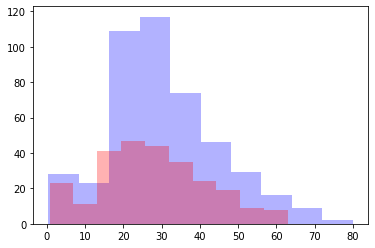

In [50]:
# Histogramas cruzados
df1 = titanic.loc[titanic['sex'] == 'male', ['age']]["age"]
df2 = titanic.loc[titanic['sex'] == 'female', ['age']]["age"]
values = dict(histtype='stepfilled', alpha=0.3, bins=10)
plt.hist(df1, color='blue', **values)
plt.hist(df2, color='red', **values)

### Stacked bar

[0 1 2]


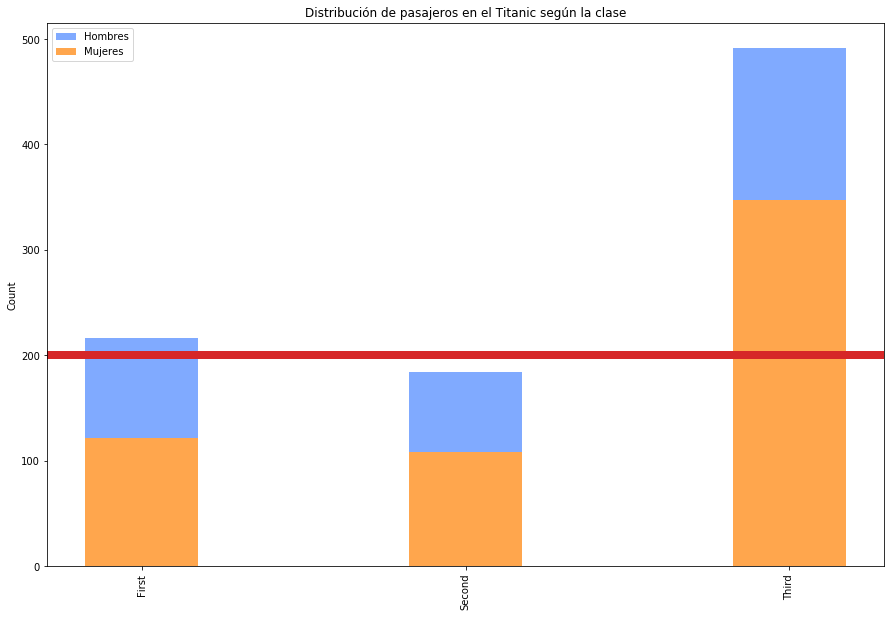

In [51]:
# Exploración de conjuntos. Gráfico de barras para el estudio de variables discretas
fig1 = plt.figure(1, figsize=(15, 10))
N = titanic.shape[0]
df_ti = titanic.pivot_table("survived", index="class", columns="sex", aggfunc='count')
N = df_ti.shape[0]
hombres = df_ti.male
mujeres = df_ti.female
ind = np.arange(N)
width = 0.35   
print(ind)
p2 = plt.bar(ind, hombres, width, color='#ffa64d')
p1 = plt.bar(ind, mujeres, width, color='#80aaff', bottom=hombres)
mujeres

plt.ylabel('Count')
plt.title('Distribución de pasajeros en el Titanic según la clase')
plt.xticks(ind, df_ti.index, rotation='vertical')
plt.legend((p1[0], p2[0]), ('Hombres', 'Mujeres'))
plt.axhline(y=200, linewidth=8, color='#d62728')

figure_name = './titanic_class_sex.png'
#plt.savefig(fname=figure_name, bbox_inches='tight')

### Series temporales

(array([736735.   , 736735.125, 736735.25 , 736735.375, 736735.5  ,
        736735.625, 736735.75 , 736735.875, 736736.   ]),
 <a list of 9 Text xticklabel objects>)

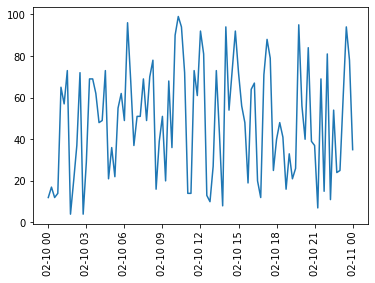

In [52]:
# crear una serie temporal desde un periodo con un paso de 15 minutos 
date_rng = pd.date_range(start='2/10/2018', end='2/11/2018', freq='15T')
# Crear una serie aleatoria con un rango de números de 0 a 100
df_random = np.random.randint(0,100,size=(date_rng.shape))
# Crear el dataframe
df = pd.DataFrame([date_rng, df_random])
# Tansposición de las columnas
df = df.T
# renombrar las columnas
df.columns = ["time", "numbers"]
# Ordenar la serie temporal
df = df.sort_values('time', ascending=True)
# Plotear la serie
plt.plot(df['time'], df['numbers'])
plt.xticks(rotation='vertical')